In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pisa = pd.DataFrame({"year": range(1975, 1988), 
                         "lean": [2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696, 
                                  2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757]})

print(pisa)

      lean  year
0   2.9642  1975
1   2.9644  1976
2   2.9656  1977
3   2.9667  1978
4   2.9673  1979
5   2.9688  1980
6   2.9696  1981
7   2.9698  1982
8   2.9713  1983
9   2.9717  1984
10  2.9725  1985
11  2.9742  1986
12  2.9757  1987


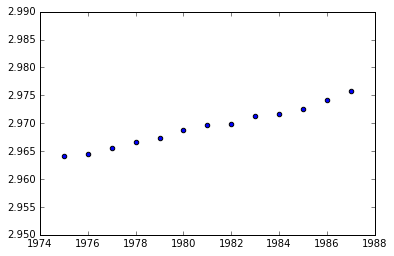

In [21]:
plt.scatter(x=pisa["year"], y=pisa["lean"])
plt.show()

In [22]:
import statsmodels.api as sm

y = pisa["lean"] # target
X = pisa["year"]  # features
X = sm.add_constant(X)  # add a column of 1's as the constant term

In [23]:
y

0     2.9642
1     2.9644
2     2.9656
3     2.9667
4     2.9673
5     2.9688
6     2.9696
7     2.9698
8     2.9713
9     2.9717
10    2.9725
11    2.9742
12    2.9757
Name: lean, dtype: float64

In [24]:
X

,const,year
0,1.0,1975
1,1.0,1976
2,1.0,1977
3,1.0,1978
4,1.0,1979
5,1.0,1980
6,1.0,1981
7,1.0,1982
8,1.0,1983
9,1.0,1984


In [25]:
# OLS -- Ordinary Least Squares Fit
linear = sm.OLS(y, X)

In [26]:
# fit model
linearfit = linear.fit()

In [27]:
print(linearfit.summary())

                            OLS Regression Results                            
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Tue, 04 Jul 2017   Prob (F-statistic):           6.50e-12
Time:                        12:47:31   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.0

/Users/jeffrey.sternberg/Code/dataquest/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [28]:
linearfit

In [30]:
# Our predicted values of y
yhat = linearfit.predict(X)

In [32]:
residuals = yhat - y

In [33]:
side_by_side = pd.DataFrame({"yhat": yhat, "y": y, "residuals": residuals})
side_by_side

,residuals,y,yhat
0,-0.000422,2.9642,2.963778
1,0.000310,2.9644,2.964710
2,0.000042,2.9656,2.965642
3,-0.000126,2.9667,2.966574
4,0.000205,2.9673,2.967505
5,-0.000363,2.9688,2.968437
6,-0.000231,2.9696,2.969369
7,0.000501,2.9698,2.970301
8,-0.000067,2.9713,2.971233
9,0.000465,2.9717,2.972165


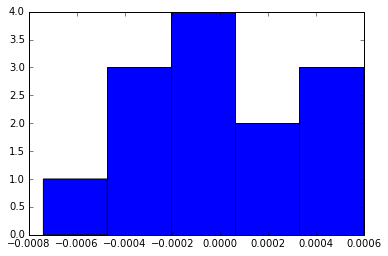

In [35]:
plt.hist(residuals, bins=5)
plt.show()

# Standard Error

In [36]:
import numpy as np

# sum the (predicted - observed) squared
# Sum of Squared Error
SSE = np.sum((y.values-yhat)**2)

# bar indicates notation, drawing a line over the y for average / mean
ybar = np.mean(y.values)

# Regression Sum of Squares -- the difference between the predictions and the mean
RSS = np.sum((ybar-yhat)**2)

# Total Sum of Squares -- the difference between the actual values and the mean
TSS = np.sum((y.values-ybar)**2)

In [37]:
SSE, RSS, TSS

(1.9228571428570597e-06, 0.00015804483516482682, 0.00015996769230769499)

In [38]:
# r squared is the regression sum of squares over the total sum of squares
R2 = RSS/TSS

In [39]:
R2

0.98797971568427967

In [40]:
# Assuming no external forces on the tower, how many meters will the tower of Pisa lean in 15 years?
delta = linearfit.params["year"] * 15
print(delta)

0.013978021978


In [41]:
linearfit.params

const    1.123338
year     0.000932
dtype: float64

In [42]:
# calculate the estimated variance of the 'year' coefficient (beta 1)
# the standard error s is the square root of the estimated variance (s2) 
# the estimated variance (s2) is the square of the standard error s

xvar = np.sum((pisa["year"] - pisa["year"].mean())**2)

s2b1 = SSE / ((pisa.shape[0] - 2) * xvar)

In [43]:
s2b1

9.6046810332520455e-10

In [44]:
# should match 3.1e-05 from the linearfit summary... and it does!
np.sqrt(s2b1)

3.0991419833967025e-05

# T Distribution

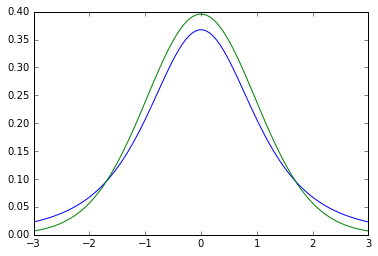

In [45]:
from scipy.stats import t

# 100 values between -3 and 3
x = np.linspace(-3,3,100)

# Compute the pdf with 3 degrees of freedom
#print(t.pdf(x=x, df=3))

# get probability density function of the t distribution for these 100 values with different degrees of freedom
tdist3 = t.pdf(x=x, df=3)
tdist30 = t.pdf(x=x, df=30)

# plot them on 1 plot
plt.plot(x, tdist3)
plt.plot(x, tdist30)
plt.show()

# Statistical Significance Of Coefficients
Now that we know what the t-distribution is we can use it for significance testing. To do significance testing we must first start by stating our hypothesis. We want to test whether the lean of the tower depends on the year, ie. every year the tower leans a certain amount. This is done by setting null and alternative hypotheses. 

In our case we will say the null hypothesis is that the lean of the tower of Pisa does not depend on the year, meaning the coefficient will be equal to zero. 

The alternative hypothesis would then be that the lean of the tower depends on the year, i.e., the coefficient is not equal to zero.

In [50]:
# The variable s2b1 is in memory.  The variance of beta_1
tstat = linearfit.params["year"] / np.sqrt(s2b1)

In [51]:
tstat

30.068584687648393

In [52]:
# At the 95% confidence interval for a two-sided t-test we must use a p-value of 0.975
pval = 0.975

# The degrees of freedom
df = pisa.shape[0] - 2

# The probability to test against
p = t.cdf(tstat, df=df)

beta1_test = p > pval

In [53]:
beta1_test

True

In [54]:
# because beta1_test is True, we reject the null hypothesis and say that the lean of the tower does depend on the year